In [1]:
# 1. Data Exploration and Preprocessing:

import pandas as pd

# Load the dataset
df = pd.read_csv("D:\\Data Science\\assignments\\adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
# Display dataset info
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [3]:
# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [4]:
# Find unique value counts for categorical features
categorical_unique_counts = df.select_dtypes(include='object').nunique()
print("\nUnique value counts for categorical features:")
print(categorical_unique_counts)


Unique value counts for categorical features:
workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    42
income             2
dtype: int64


In [5]:
# Detect and handle hidden missing values ("?")
# Check how many "?" are present in each column
import numpy as np
print("\nChecking for '?' values (including those with spaces):")

for col in df.columns:
    if df[col].dtype == 'object':
        # Strip spaces before checking
        df[col] = df[col].str.strip()
        count = (df[col] == '?').sum()
        if count > 0:
            print(f"{col}: {count} '?' values")

# Replace '?' with NaN for easier handling
df.replace('?', np.nan, inplace=True)



Checking for '?' values (including those with spaces):
workclass: 1836 '?' values
occupation: 1843 '?' values
native_country: 583 '?' values


In [6]:
print("\nMissing values after replacing '?':")
print(df.isna().sum())



Missing values after replacing '?':
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


In [7]:
# Impute missing values in categorical columns with mode
for col in ['workclass', 'occupation', 'native_country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_2068\3965464912.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [8]:
print("\nMissing values after imputation:")
print(df.isna().sum())


Missing values after imputation:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [9]:
# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())



Summary Statistics for Numerical Columns:
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [10]:
# Summary statistics for categorical columns
print("\nSummary Statistics for Categorical Columns:")
print(df.describe(include=['object']))


Summary Statistics for Categorical Columns:
       workclass education      marital_status      occupation relationship  \
count      32561     32561               32561           32561        32561   
unique         8        16                   7              14            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       24532     10501               14976            5983        13193   

         race    sex native_country income  
count   32561  32561          32561  32561  
unique      5      2             41      2  
top     White   Male  United-States  <=50K  
freq    27816  21790          29753  24720  


In [11]:
# Define numerical columns
num_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
print("\nNumerical Columns:", num_cols)



Numerical Columns: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [12]:
# Applying scaling techniques
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Apply Standard Scaling
scaler_standard = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[num_cols] = scaler_standard.fit_transform(df[num_cols])

# Apply Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[num_cols] = scaler_minmax.fit_transform(df[num_cols])

# Display scaled data examples
print("\nStandard Scaled Data (first 5 rows):")
print(df_standard_scaled[num_cols].head())



Standard Scaled Data (first 5 rows):
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   

   hours_per_week  
0       -0.035429  
1       -2.222153  
2       -0.035429  
3       -0.035429  
4       -0.035429  


In [13]:
print("\nMin-Max Scaled Data (first 5 rows):")
print(df_minmax_scaled[num_cols].head())


Min-Max Scaled Data (first 5 rows):
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000           0.0   

   hours_per_week  
0        0.397959  
1        0.122449  
2        0.397959  
3        0.397959  
4        0.397959  


In [ ]:
"""
Explanation:

-> Standard Scaling is preferred when data follows (or approximately follows) a normal distribution,
   e.g., age or education_num.

-> Min-Max Scaling is useful when the model (like KNN, Neural Networks) is sensitive to feature magnitudes
   and requires features in a fixed range [0, 1].

-> Algorithms like Linear Regression or Logistic Regression usually perform better with StandardScaler.

"""

In [14]:
# 2. Encoding Techniques:

from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("\nCategorical Columns:", cat_cols)


Categorical Columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [15]:
# Separate columns based on number of unique categories
onehot_cols = [col for col in cat_cols if df[col].nunique() < 5]
label_cols = [col for col in cat_cols if df[col].nunique() >= 5]

print("\nOne-Hot Encoding will be applied to:", onehot_cols)
print("\nLabel Encoding will be applied to:", label_cols)


One-Hot Encoding will be applied to: ['sex', 'income']

Label Encoding will be applied to: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']


In [16]:
# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=onehot_cols, drop_first=True)
df_encoded.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_Male,income_>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,True,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,True,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,True,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,True,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,False,False


In [17]:
# Apply Label Encoding
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

print("\nEncoded Dataset Preview:")
print(df_encoded.head())


Encoded Dataset Preview:
   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          6   77516          9             13               4   
1   50          5   83311          9             13               2   
2   38          3  215646         11              9               0   
3   53          3  234721          1              7               2   
4   28          3  338409          9             13               2   

   occupation  relationship  race  capital_gain  capital_loss  hours_per_week  \
0           0             1     4          2174             0              40   
1           3             0     4             0             0              13   
2           5             1     4             0             0              40   
3           5             0     2             0             0              40   
4           9             5     2             0             0              40   

   native_country  sex_Male  income_>50K  
0              38

In [18]:
# Show final shape
print("\nDataset shape before encoding:", df.shape)
print("Dataset shape after encoding:", df_encoded.shape)


Dataset shape before encoding: (32561, 15)
Dataset shape after encoding: (32561, 15)


In [ ]:
"""

Pros and Cons of One-Hot Encoding and Label Encoding

One-Hot Encoding:
-> It creates binary indicator columns for each category (e.g., sex_Male, sex_Female).

Pros:

-> No implicit ordering — safe for nominal (non-ordinal) categories.

-> Works well with linear models and distance-based algorithms because it prevents incorrect ordinal assumptions.

-> Interpretability is straightforward — each column corresponds to a category.

Cons:

-> High dimensionality / sparsity: if a categorical variable has many unique values, one-hot creates many columns 
   which increases memory use and can hurt model performance.

-> Can cause the dummy variable trap (multicollinearity) if you keep all dummies — solve by dropping one 
   column (drop_first=True) or using regularization.

-> Slower training and inference when many dummy columns exist.

When to use:

-> Few categories (typically < 5–10).

-> Nominal (no natural order) features and models sensitive to numerical ordering (linear models, k-NN, SVM).


Label Encoding:
-> It maps each category to an integer (e.g., Bachelors → 2, Masters → 3).

Pros:

-> Compact — no extra columns, so good for high-cardinality features.

-> Fast and memory efficient.

-> Works well with tree-based models (decision trees, random forests, gradient boosting) which treat integers
   as categories implicitly.

Cons:

-> Implicit ordinal relationship — integers introduce an order that may not exist (can mislead linear models 
   or algorithms that assume numeric meaning).

-> Can harm distance-based models (k-NN) because numeric labels imply distances between categories.

-> Requires care for unseen categories at inference time (need mapping or a special code).

When to use:

-> High-cardinality categorical variables.

-> Models that are robust to integer labels (tree-based models).

-> When we need to keep feature space small.

"""

In [ ]:
"""

3. Feature Engineering:

Creating New Features:

-> We can derive new, meaningful information from existing columns to improve model performance.
-> Here are two new features commonly useful in this dataset:

   1. capital_diff = capital_gain - capital_loss

-> Combines both monetary columns into a single metric showing net capital income.
-> Positive = gain, Negative = loss.
-> Simplifies feature space and helps models understand financial standing.

   2. work_hours_category

-> Categorizes people based on their weekly working hours:

   "Part-time" if < 35 hours

   "Full-time" if 35–45 hours

   "Overtime" if > 45 hours

-> Converts continuous working hours into meaningful job-type categories.

"""

In [19]:
import numpy as np

# Create new feature: net capital difference
df_encoded['capital_diff'] = df_encoded['capital_gain'] - df_encoded['capital_loss']

# Create new feature: work_hours_category
def categorize_hours(hours):
    if hours < 35:
        return 'Part-time'
    elif hours <= 45:
        return 'Full-time'
    else:
        return 'Overtime'

df_encoded['work_hours_category'] = df_encoded['hours_per_week'].apply(categorize_hours)

print("\nNew Features Created:")
print(df_encoded[['capital_gain', 'capital_loss', 'capital_diff', 'hours_per_week', 'work_hours_category']].head())



New Features Created:
   capital_gain  capital_loss  capital_diff  hours_per_week  \
0          2174             0          2174              40   
1             0             0             0              13   
2             0             0             0              40   
3             0             0             0              40   
4             0             0             0              40   

  work_hours_category  
0           Full-time  
1           Part-time  
2           Full-time  
3           Full-time  
4           Full-time  


In [20]:
# Log Transformation
# LOG TRANSFORMATION FOR SKEWED FEATURES

# Check skewness of numerical columns
print("\nSkewness before log transformation:")
print(df_encoded[['capital_gain', 'capital_loss']].skew())



Skewness before log transformation:
capital_gain    11.953848
capital_loss     4.594629
dtype: float64


In [21]:

# Apply log(1 + x) to handle zeros safely
df_encoded['capital_gain_log'] = np.log1p(df_encoded['capital_gain'])
df_encoded['capital_loss_log'] = np.log1p(df_encoded['capital_loss'])

print("\nSkewness after log transformation:")
print(df_encoded[['capital_gain_log', 'capital_loss_log']].skew())



Skewness after log transformation:
capital_gain_log    3.096144
capital_loss_log    4.307537
dtype: float64


In [ ]:
"""

Why Log Transform?

-> capital_gain and capital_loss are highly skewed — many people have 0 gain/loss, while a few have 
   very large values.

-> Applying log(1 + x) reduces this skewness, making data more normally distributed.

-> Models like Linear Regression, Logistic Regression, and SVM perform better on less skewed features.

"""

In [22]:
# 4. Feature Selection:

# Outlier Detection with Isolation Forest
# FEATURE SELECTION — ISOLATION FOREST

from sklearn.ensemble import IsolationForest

# Select numerical columns for outlier detection
num_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Initialize Isolation Forest
iso = IsolationForest(contamination=0.02, random_state=42)

# Fit and predict (1 = normal, -1 = outlier)
outlier_flags = iso.fit_predict(df_encoded[num_features])

# Add a column to indicate outliers
df_encoded['outlier'] = outlier_flags

# Count outliers
print("\nOutlier Detection Summary:")
print(df_encoded['outlier'].value_counts())



Outlier Detection Summary:
outlier
 1    31909
-1      652
Name: count, dtype: int64


In [23]:
# Remove outliers
df_no_outliers = df_encoded[df_encoded['outlier'] == 1].drop(columns=['outlier'])

print("\nShape before removing outliers:", df_encoded.shape)
print("Shape after removing outliers:", df_no_outliers.shape)


Shape before removing outliers: (32561, 20)
Shape after removing outliers: (31909, 19)


In [ ]:
"""

Why remove outliers?

-> Outliers can distort model coefficients, scaling, and learning.

-> For example, extremely high capital_gain or hours_per_week values can bias predictions.

-> Removing them makes the dataset cleaner and improves model robustness.

"""

In [ ]:
pip install ppscore

In [ ]:
"""
NOTE:

Issue: The ppscore library requires older versions of pandas and numpy. Installing it downgrades these libraries,
       causing the error.
       
ValueError: numpy.dtype size changed, may indicate binary incompatibility.

Solution: Instead of ppscore, we'll use Mutual Information Scores from scikit-learn, which measure the 
          dependency between features and the target — including non-linear relationships.

"""

In [29]:
# FEATURE SELECTION — MUTUAL INFORMATION (Alternative to PPS)

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import pandas as pd

# Copy the data
df_encoded = df_no_outliers.copy()

# Encode all object or category columns
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Separate features and target
X = df_encoded.drop(columns=['income_>50K'])
y = df_encoded['income_>50K']

# Compute Mutual Information Scores
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Create DataFrame for results
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)

# Display top 10 features
print("\nTop Features by Mutual Information:")
print(mi_df.head(10))



Top Features by Mutual Information:
             Feature  MI_Score
7       relationship  0.112940
5     marital_status  0.107406
14      capital_diff  0.100010
9       capital_gain  0.074140
16  capital_gain_log  0.072700
0                age  0.063859
4      education_num  0.059993
3          education  0.058962
6         occupation  0.048735
11    hours_per_week  0.039144


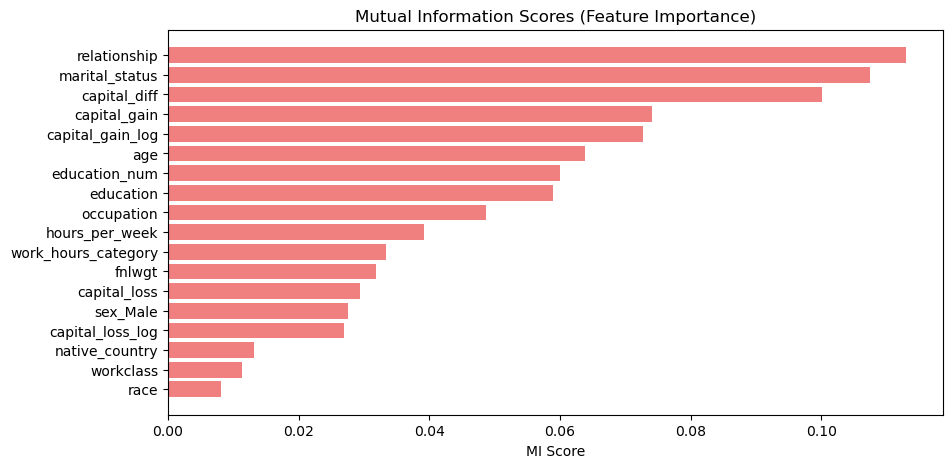

In [30]:
# Plot MI Scores
plt.figure(figsize=(10,5))
plt.barh(mi_df['Feature'], mi_df['MI_Score'], color='lightcoral')
plt.gca().invert_yaxis()
plt.title('Mutual Information Scores (Feature Importance)')
plt.xlabel('MI Score')
plt.show()

In [31]:
# Correlation matrix (numeric)
corr = df_encoded.corr()

# Correlation of every feature with the target (sorted by absolute correlation)
target_corr = corr['income_>50K'].drop('income_>50K')  # drop self-correlation
target_corr_sorted = target_corr.reindex(target_corr.abs().sort_values(ascending=False).index)

print("\nTop features by absolute Pearson correlation with target:")
print(target_corr_sorted.head(15))

# For side-by-side comparison: merge MI results (mi_df from earlier) with correlation
mi_df_small = mi_df.set_index('Feature')  # mi_df created earlier from mutual_info_classif
comparison_df = pd.DataFrame({
    'MI_Score': mi_df_small['MI_Score'],
    'Correlation_with_Target': target_corr.reindex(mi_df_small.index)
}).sort_values(by='MI_Score', ascending=False)

print("\n\nComparison (MI vs Pearson correlation):")
print(comparison_df.head(15))



Top features by absolute Pearson correlation with target:
education_num          0.321616
capital_gain           0.315937
capital_diff           0.292139
capital_gain_log       0.263985
relationship          -0.248077
age                    0.227049
hours_per_week         0.223053
sex_Male               0.212852
marital_status        -0.197887
capital_loss           0.130094
capital_loss_log       0.120907
education              0.074482
race                   0.070754
work_hours_category   -0.069193
occupation             0.031407
Name: income_>50K, dtype: float64


Comparison (MI vs Pearson correlation):
                     MI_Score  Correlation_with_Target
Feature                                               
relationship         0.112940                -0.248077
marital_status       0.107406                -0.197887
capital_diff         0.100010                 0.292139
capital_gain         0.074140                 0.315937
capital_gain_log     0.072700                 0.263985


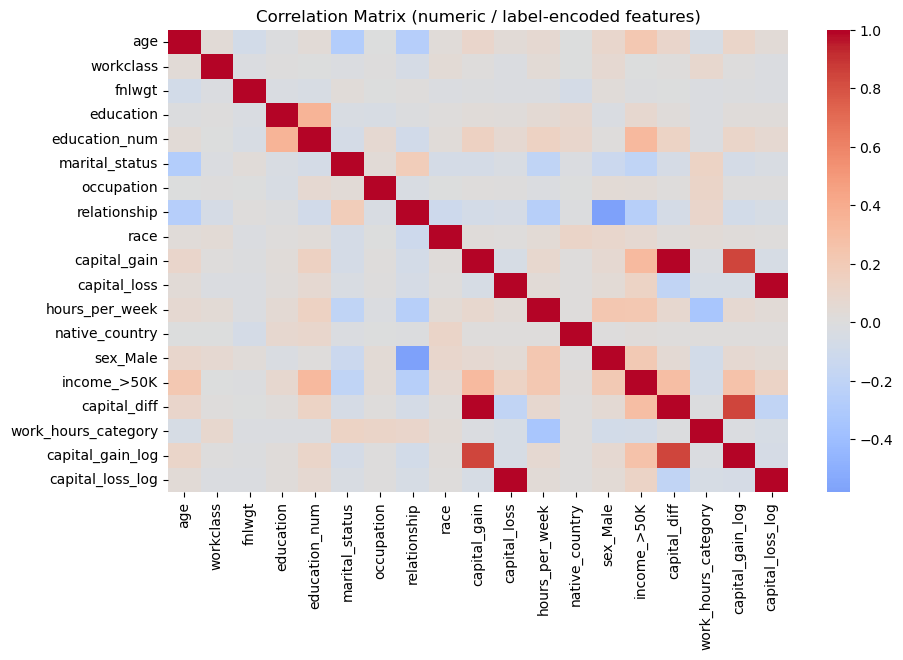

In [32]:
# Visual: correlation heatmap (numeric only)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Matrix (numeric / label-encoded features)')
plt.show()

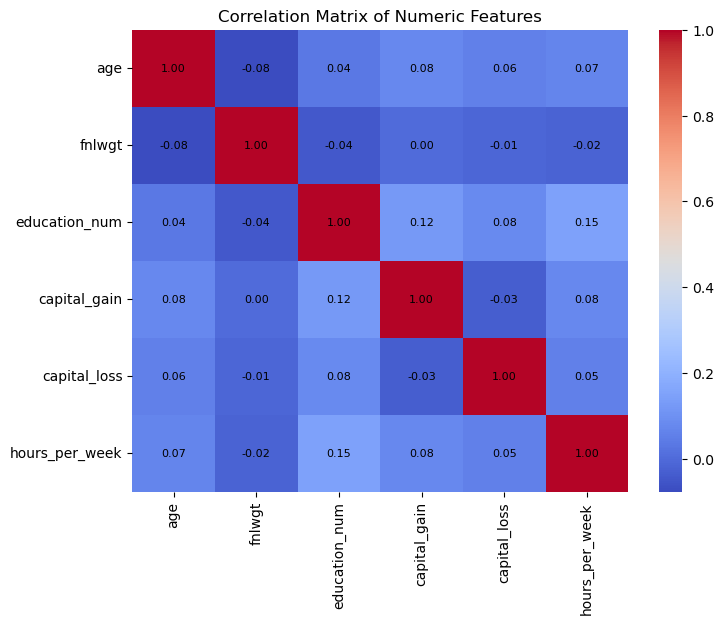

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":8, "color":'black'})
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [ ]:
"""

Comparison of Mutual Information (Alternative to PPS) with Correlation Matrix:

-> Since installing the ppscore package caused version conflicts with numpy and pandas, Mutual Information (MI) 
   was used as an alternative. MI is conceptually similar to PPS because it captures both linear and non-linear
   dependencies between features and the target, while Pearson correlation measures only linear relationships 
   among numeric variables.

-> Top MI features: relationship, marital_status, capital_diff, capital_gain, and capital_gain_log.
   These variables carry strong predictive information about whether income exceeds $50K, even when relationships are non-linear or categorical.

-> Top Correlated features: education_num, capital_gain, capital_diff, and age.
   These show strong linear associations with income but miss categorical and non-linear effects.

Comparison Insight:

        OBSERVATION                                               EXPLANATION
relationship and marital_status rank           They are categorical; MI correctly captures their predictive power, 
very high in MI but show negative              while Pearson correlation underestimates them.
correlations

Numeric variables like capital_gain and        Their linear relationship with income makes them important under
education_num are top in both MI and           both metrics.
correlation 

MI reveals subtle relationships that           This shows MI (like PPS) is more versatile for mixed data types.
correlation misses


Conclusion:
While the correlation matrix helps identify linear relationships between numeric variables, Mutual Information 
(PPS alternative) better highlights the overall predictive strength of both categorical and numeric features. 
Using both together gives a more complete understanding of feature relevance.

"""